In [3]:
#pip install python-docx pandas nltk
#nltk.download('stopwords')
#pip install nltk scikit-learn pandas python-docx

In [1]:
import os
import re
import numpy as np
import pandas as pd
from docx import Document
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Function to extract text from a .docx file
def extract_text_from_docx(file_path):
    try:
        doc = Document(file_path)
        return " ".join([para.text for para in doc.paragraphs])
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return None

# Preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize into words
    words = text.split()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Stemming
    stemmer = PorterStemmer()
    words = [stemmer.stem(word) for word in words]
    return " ".join(words)


In [2]:
# Loading the CSV file with file paths and labels
df = pd.read_csv('data.csv')  # Update with the path to your CSV file

# Lists to hold the document texts and labels
texts = []
labels = []

# Read and process each file
for i, row in df.iterrows():
    file_path = row['file_path']
    label = row['label']
    if os.path.isfile(file_path):
        text = extract_text_from_docx(file_path)
        if text:  # Only add texts that were successfully extracted
            texts.append(text)
            labels.append(label)
    else:
        print(f"File {file_path} not found.")


In [3]:
# Preprocess all document texts
preprocessed_texts = [preprocess_text(text) for text in texts]

# Initialize TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit number of features to 5000

# Fit and transform the preprocessed texts
X_tfidf = tfidf_vectorizer.fit_transform(preprocessed_texts)

# Convert the labels list to a numpy array
y = np.array(labels)


In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [5]:
# Predict on the test set
y_pred = model.predict(X_test)

# Print the classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Print the accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.86      1.00      0.92         6

    accuracy                           0.86         7
   macro avg       0.43      0.50      0.46         7
weighted avg       0.73      0.86      0.79         7

Confusion Matrix:
[[0 1]
 [0 6]]
Accuracy Score: 0.8571428571428571


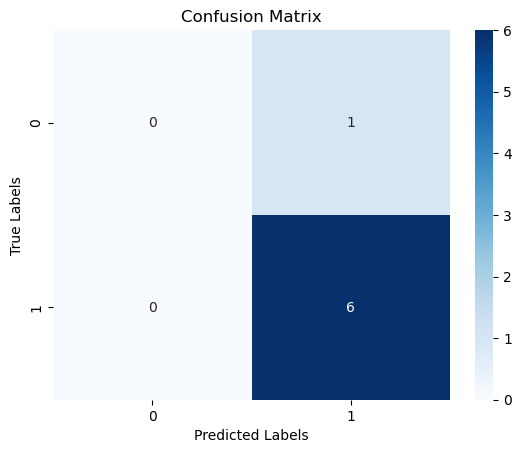

In [6]:
# Visualize the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [7]:
def test_new_document(file_path, model, tfidf_vectorizer):
    # Extract text from the new document
    text = extract_text_from_docx(file_path)
    # Preprocess the text
    preprocessed_text = preprocess_text(text)
    # Transform the text to TF-IDF features
    X_new = tfidf_vectorizer.transform([preprocessed_text])
    # Make a prediction
    prediction = model.predict(X_new)
    return prediction

#Now we test our own document:
new_doc_path = 'research_paper.docx'  # Replace with the path to document to test
prediction = test_new_document(new_doc_path, model, tfidf_vectorizer)
print("The document is", "compliant" if prediction[0] == 1 else "non-compliant")


The document is compliant
